<a href="https://colab.research.google.com/github/Arshya80k/mydata-analysis-project/blob/MAIN/breast_cancer_clinical_final_pythonCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing the csv file

In [28]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
file_path = '/content/drive/MyDrive/METABRIC_RNA_Mutation.csv'

In [30]:
# 3. Load the data
df = pd.read_csv(file_path)
print(f"Dataset loaded successfully with {df.shape[0]} rows and {df.shape[1]} columns!")

Dataset loaded successfully with 1904 rows and 693 columns!


/tmp/ipython-input-3804447689.py:2: DtypeWarning: Columns (678,688,690,692) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


#Removing extra columns and keeping the ones we want

In [31]:
presentation_cols = [
    'patient_id', 'age_at_diagnosis', 'tumor_stage',
    'overall_survival_months', 'death_from_cancer',
    'brca1', 'tp53', 'erbb2', 'egfr' ] #creating list of columns I want to include


slim_df = df[presentation_cols].copy() #narrowing down the df to the selected columns in the list

slim_df['patient_id'] = slim_df['patient_id'].astype(str) # changing id column data type from int to string
# to avoid unecessary calculations

# checking for null values
print(slim_df.isnull().sum())

patient_id                   0
age_at_diagnosis             0
tumor_stage                501
overall_survival_months      0
death_from_cancer            1
brca1                        0
tp53                         0
erbb2                        0
egfr                         0
dtype: int64


#Cleaning out Null values

In [32]:
# tumor_stage has 501 missing so I will change it to unknown
slim_df['tumor_stage'] = slim_df['tumor_stage'].fillna("Unknown")

# death_from_cancer has 1 missing so I will just drop it
slim_df = slim_df.dropna(subset=['death_from_cancer'])

# checking for updated null values
print(slim_df.isnull().sum())

#to check the correct amount of rows dropped
print(len(slim_df))

patient_id                 0
age_at_diagnosis           0
tumor_stage                0
overall_survival_months    0
death_from_cancer          0
brca1                      0
tp53                       0
erbb2                      0
egfr                       0
dtype: int64
1903


In [33]:
print(slim_df.dtypes) # to make sure the data types are correct before uploading to Tableau

patient_id                  object
age_at_diagnosis           float64
tumor_stage                 object
overall_survival_months    float64
death_from_cancer           object
brca1                      float64
tp53                       float64
erbb2                      float64
egfr                       float64
dtype: object


#Checking Data for typos

In [34]:
print(slim_df['tumor_stage'].unique()) # to check for typos by printing all the unique objects
print("-------------------------------")
print(slim_df['death_from_cancer'].unique()) # same check with the second object of our table

[2.0 1.0 4.0 3.0 'Unknown' 0.0]
-------------------------------
['Living' 'Died of Disease' 'Died of Other Causes']


In [35]:
# convering everything to string to make sure Python treats them as categories
slim_df['tumor_stage'] = slim_df['tumor_stage'].astype(str)

In [36]:
# Creating a "Dictionary" mapping old values to better string names
stage_mapping = {
    '0.0': 'Stage 0',
    '1.0': 'Stage I',
    '2.0': 'Stage II',
    '3.0': 'Stage III',
    '4.0': 'Stage IV',
    'Unknown': 'Unknown'}

# Applying the new name mappings to the column
slim_df['tumor_stage'] = slim_df['tumor_stage'].replace(stage_mapping)

# to check the results
print(slim_df['tumor_stage'].unique())

['Stage II' 'Stage I' 'Stage IV' 'Stage III' 'Unknown' 'Stage 0']


#Visualising Data for a final check

/tmp/ipython-input-763005782.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='tumor_stage', y='brca1', data=slim_df, palette="Set2" , order=stage_order)


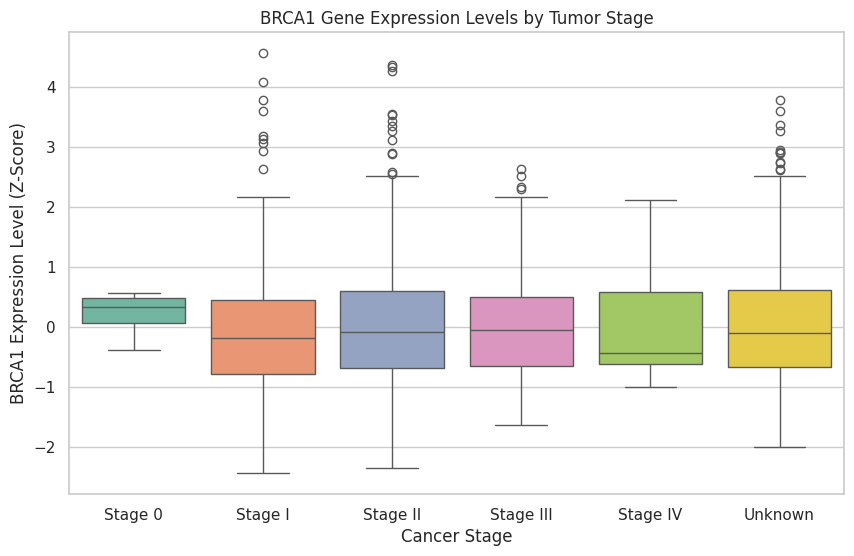

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Setting a background style for the plot
sns.set_theme(style="whitegrid")

# 2. Set the size of the figure (Width, Height)
plt.figure(figsize=(10, 6))

# 2. Defining the correct order for the graph
stage_order = ['Stage 0', 'Stage I', 'Stage II', 'Stage III', 'Stage IV', 'Unknown']

# 3. Creating the Box Plot
# x = The groups (Stages)
# y = The data we are measuring (BRCA1 expression)
sns.boxplot(x='tumor_stage',
            y='brca1',
            data=slim_df,
            palette="Set2",
            order=stage_order)

# 4. Adding titles
plt.title('BRCA1 Gene Expression Levels by Tumor Stage')
plt.xlabel('Cancer Stage')
plt.ylabel('BRCA1 Expression Level (Z-Score)')

plt.show()

#Saving Data and the Graph to export

In [38]:
# Saving the final file
slim_df.to_csv('breast_cancer_clinical_final.csv', index=False)
print("Final dataset saved!")

plt.savefig('brca1_boxplot.png', dpi=300) # saving the Box plot as an image to upload in github
print("Graph saved as 'brca1_boxplot.png'")

Final dataset saved!
Graph saved as 'brca1_boxplot.png'


<Figure size 640x480 with 0 Axes>